In [117]:
import sqlite3
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

total_ventas = pd.read_sql_query("""
    SELECT SUM(precio_total) AS ingreso_total FROM tickets
""", conexion)
print(f"Ingreso total generado por el negocio: {total_ventas['ingreso_total'][0]:,.2f}")

conexion.close()

Ingreso total generado por el negocio: 39,854,875.32


In [3]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

tendencia_ventas = pd.read_sql_query("""
    SELECT Strftime('%Y-%m', fecha) AS mes, SUM(precio_total) AS ingresos_mensuales 
    FROM tickets
    GROUP BY mes
    ORDER BY mes                               
""", conexion)
print(tendencia_ventas)

conexion.close()


        mes  ingresos_mensuales
0   2023-01        6.673100e+06
1   2023-02        4.945203e+06
2   2023-03        4.725677e+06
3   2023-04        3.994824e+06
4   2023-05        3.626727e+06
5   2023-06        3.125001e+06
6   2023-07        2.937364e+06
7   2023-08        2.533350e+06
8   2023-09        2.343859e+06
9   2023-10        2.127270e+06
10  2023-11        1.637900e+06
11  2023-12        1.184601e+06


In [6]:
tendencia_ventas_organizado = tendencia_ventas.sort_values('ingresos_mensuales', ascending=False)
tendencia_ventas_organizado

,mes,ingresos_mensuales
0,2023-01,6.673100e+06
1,2023-02,4.945203e+06
2,2023-03,4.725677e+06
3,2023-04,3.994824e+06
4,2023-05,3.626727e+06
5,2023-06,3.125001e+06
6,2023-07,2.937364e+06
7,2023-08,2.533350e+06
8,2023-09,2.343859e+06
9,2023-10,2.127270e+06


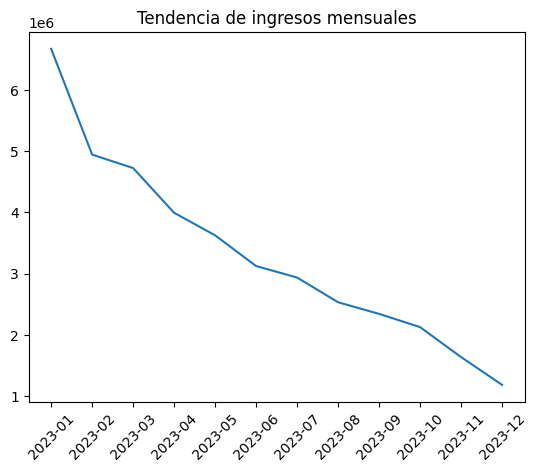

In [19]:
#Graficos
plt.plot(tendencia_ventas_organizado['mes'], tendencia_ventas_organizado['ingresos_mensuales'])
plt.title("Tendencia de ingresos mensuales")
plt.xticks(rotation=45)
plt.show()


In [ ]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

mostrar_datos = pd.read_sql_query("""
    SELECT * FROM tickets LIMIT 10                         
""", conexion)
print(mostrar_datos)

conexion.close()

In [23]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

rendimiento = pd.read_sql_query("""
    SELECT id_departamento, SUM(precio_total) AS rendimiento FROM tickets
    GROUP BY id_departamento   
    ORDER BY rendimiento DESC         
""", conexion)
print(rendimiento)

conexion.close()

   id_departamento   rendimiento
0                4  3.700325e+07
1               16  1.529355e+06
2               20  9.462209e+05
3                7  3.760480e+05


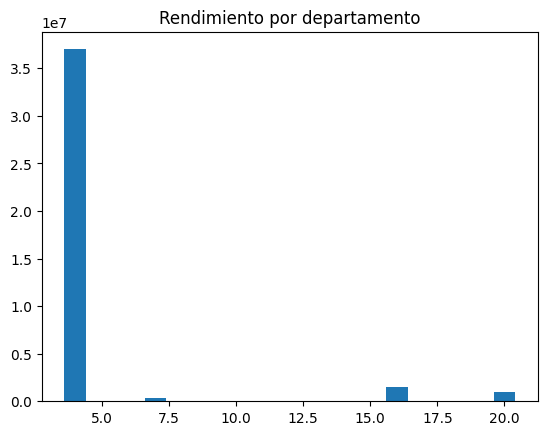

In [109]:
plt.bar(rendimiento['id_departamento'], rendimiento['rendimiento'])
plt.title('Rendimiento por departamento')
plt.show()

In [32]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

distribucion = pd.read_sql_query("""
    SELECT id_seccion, SUM(precio_total) AS distribucion FROM tickets
    GROUP BY id_seccion 
    ORDER BY distribucion DESC
""", conexion)
print(distribucion)

conexion.close()


   id_seccion  distribucion
0          24  2.087937e+07
1         123  8.634824e+06
2          83  7.237313e+06
3          67  9.462209e+05
4          53  8.214206e+05
5          84  7.079341e+05
6         115  3.760480e+05
7          16  2.517403e+05


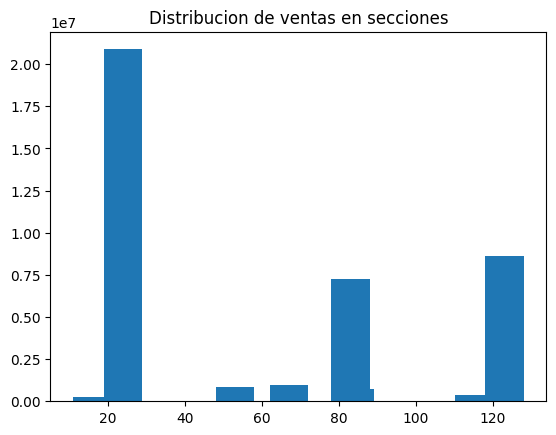

In [106]:
plt.bar(distribucion['id_seccion'], distribucion['distribucion'], width=10 )
plt.title('Distribucion de ventas en secciones')
plt.show()

In [75]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

vendidos = pd.read_sql_query("""
    SELECT nombre_producto, SUM(cantidad) AS vendidos FROM tickets
    GROUP BY nombre_producto
    ORDER BY vendidos DESC 
    LIMIT 10                       
""", conexion)
print(vendidos)

conexion.close()


              nombre_producto  vendidos
0                      Banana   2460324
1  Bolsa de Bananas Orgánicas   1976709
2            Fresas Orgánicas   1381309
3    Espinacas Baby Orgánicas   1258330
4      Aguacate Hass Orgánico   1104957
5           Aguacate Orgánico    923461
6                Limón Grande    804752
7                      Fresas    748065
8                     Limones    733736
9       Leche Entera Orgánica    715085


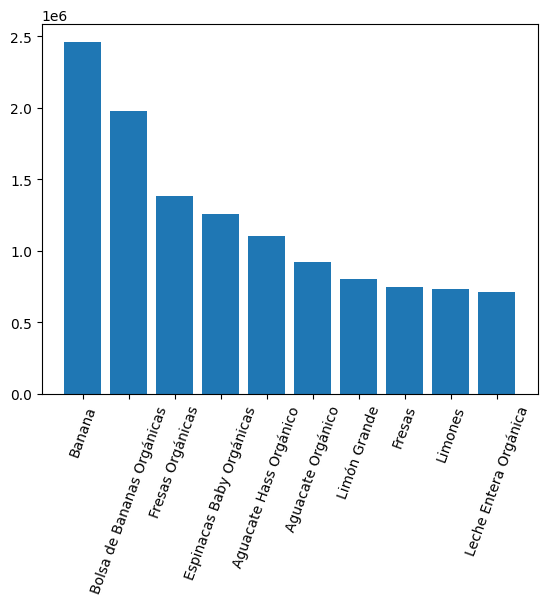

In [80]:
plt.bar(vendidos['nombre_producto'], vendidos['vendidos'])
plt.xticks(rotation= 70)
plt.show()

In [87]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

ingresos = pd.read_sql_query("""  
    SELECT nombre_producto, SUM(cantidad * precio_unitario) AS ingresos FROM tickets     
    GROUP BY nombre_producto 
    ORDER BY Ingresos DESC   
    LIMIT 10        
""", conexion)
print(ingresos)

conexion.close()

              nombre_producto      ingresos
0  Bolsa de Bananas Orgánicas  4.842937e+06
1            Fresas Orgánicas  3.439459e+06
2                      Banana  2.583340e+06
3        Frambuesas Orgánicas  2.032919e+06
4      Aguacate Hass Orgánico  1.977873e+06
5    Espinacas Baby Orgánicas  1.874912e+06
6           Aguacate Orgánico  1.616057e+06
7                      Fresas  1.533533e+06
8         Arándanos Orgánicos  1.444778e+06
9    Tomates Cherry Orgánicos  1.128041e+06


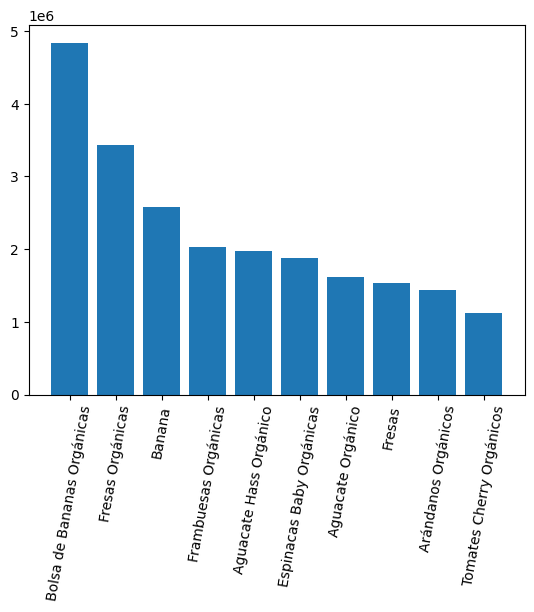

In [89]:
plt.bar(ingresos['nombre_producto'], ingresos['ingresos'])
plt.xticks(rotation=80)
plt.show()

In [124]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

compradores = pd.read_sql_query("""  
    SELECT id_cliente, SUM(precio_total) AS compradores FROM tickets 
    GROUP BY id_cliente
    ORDER BY compradores DESC
    LIMIT 20        
""", conexion)
print(compradores)

conexion.close()


    id_cliente  compradores
0       189425      4784.44
1       145686      4656.01
2        95967      4441.07
3        67870      4381.49
4        51256      4280.17
5       108031      4170.37
6       105213      4164.07
7        66806      4010.08
8       153932      3966.09
9       143296      3887.86
10      175294      3886.68
11        1197      3883.76
12       62239      3873.40
13        5665      3862.69
14       31552      3852.53
15      132274      3842.65
16       14868      3836.05
17      103634      3808.71
18      132022      3803.13
19       94701      3783.81


<function matplotlib.pyplot.show(close=None, block=None)>

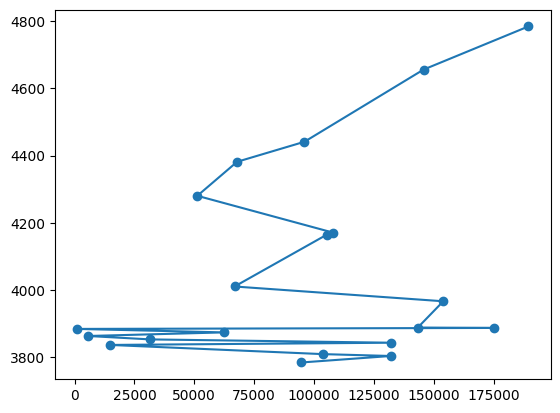

In [131]:
plt.plot(compradores['id_cliente'], compradores['compradores'], marker='o')
plt.show

In [32]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

Compra_media = pd.read_sql_query("""  
    SELECT AVG(media_cliente) AS CompraMediaPorCliente
    FROM
    (
        SELECT id_cliente, SUM(precio_total) AS media_cliente FROM tickets
        GROUP BY id_cliente) AS C  
""", conexion)
print(Compra_media)

conexion.close()

   CompraMediaPorCliente
0             219.099604


In [23]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

pedidos = pd.read_sql_query("""  
    SELECT COUNT(DISTINCT id_pedido) AS PedidosTotales FROM tickets 
""", conexion)
print(pedidos)

conexion.close()

   PedidosTotales
0         2060188


In [30]:
conexion = sqlite3.connect('./datos/sanoyfresco.db')

PromedioPedido = pd.read_sql_query("""  
    SELECT AVG(ValorPromedio) AS Promedio_Por_Pedido 
    FROM(
        SELECT SUM(precio_total) AS ValorPromedio FROM tickets
        GROUP BY id_pedido) AS P
""", conexion)
print(PromedioPedido)

conexion.close()

   Promedio_Por_Pedido
0            19.345261
